# 1) Import Libraries

In [1]:
    import re
    import datetime
    import calendar
    from math import sqrt

    import pandas as pd
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    %matplotlib inline

In [2]:
import seaborn as sns
sns.set_style('ticks')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2) Read Data

In [4]:
def parse_date_string(x):
    dt_obj = datetime.datetime.strptime(x, "%b-%y")
    day=calendar.monthrange(dt_obj.year, dt_obj.month)[1]
    last_date = '{}'.format(day)+datetime.datetime.strftime(dt_obj, "-%m-%Y")
    return datetime.datetime.strptime(last_date, "%d-%m-%Y")

In [5]:
df = pd.read_csv('Cloud Price Data.csv')
display(df.head())

,Months,Price
0,Sep-19,32USD
1,Oct-19,38USD
2,Nov-19,59USD
3,Dec-19,88USD
4,Jan-20,82USD


In [6]:
#Change Months column from string to datetime format
df['Months'] = df['Months'].apply(lambda x: parse_date_string(x))

df.set_index('Months', inplace=True)

#Change the Price Column to integers
df['Price']=df['Price'].apply(lambda x:float(re.match(r'[0-9]*', x).group()))
df

,Price
Months,
2019-09-30,32.0
2019-10-31,38.0
2019-11-30,59.0
2019-12-31,88.0
2020-01-31,82.0
2020-02-29,101.0
2020-03-31,133.0
2020-04-30,158.0
2020-05-31,177.0


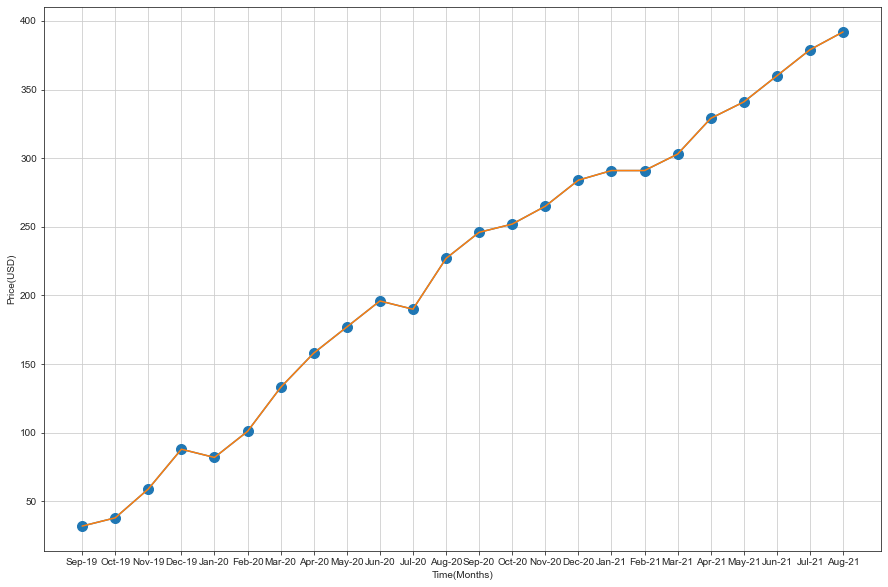

In [7]:
fig = plt.figure(figsize=(15,10))
plt.xlabel('Time(Months)', fontsize=10)
plt.ylabel('Price(USD)', fontsize=10)
plt.grid()
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Price'], '-o', markersize=10)
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Price'], )
plt.savefig('test sm.jpeg')
plt.show()

# 3)Split the data into train and test data

In [8]:
n_obs = df.shape[0]

train_split_percentage = 0.85

train_data = df.iloc[:round(n_obs * train_split_percentage)]
test_data = df.iloc[round(n_obs * train_split_percentage):]

In [9]:
# Display the Test and train data
print(train_data.shape)
print(test_data.shape)

(20, 1)
(4, 1)


In [10]:
display(train_data.tail())
display(test_data.head())

,Price
Months,
2020-12-31,284.0
2021-01-31,291.0
2021-02-28,291.0
2021-03-31,303.0
2021-04-30,329.0


,Price
Months,
2021-05-31,341.0
2021-06-30,360.0
2021-07-31,379.0
2021-08-31,392.0


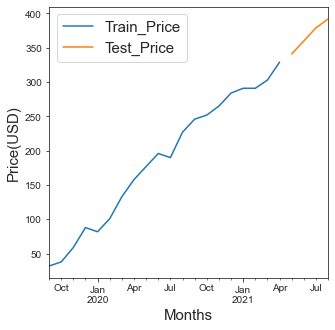

In [11]:
plt.figure(figsize=(5,5))
plt.xlabel('Time(Time Duration)', fontsize=15)
plt.ylabel('Price(USD)', fontsize=15)
plt.rc('legend',fontsize=15)
train_data['Price'].rename('Train_Price').plot(legend=True)
plt.savefig('test vs train.jpeg')
test_data['Price'].rename('Test_Price').plot(legend=True)



# 4)Finding differencing order "d"

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf_test_result = adfuller(df['Price'])
adf_test_result

(-1.1061461428437622,
 0.7126146809175691,
 2,
 21,
 {'1%': -3.7883858816542486,
  '5%': -3.013097747543462,
  '10%': -2.6463967573696143},
 108.91959574544092)

In [14]:
adftest_result = pd.Series(adf_test_result[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result

Adf test statistic        -1.106146
p-value                    0.712615
number of lags             2.000000
number of observations    21.000000
dtype: float64

In [15]:
from statsmodels.tsa.statespace.tools import diff

In [16]:
df['Price'].head()

Months
2019-09-30    32.0
2019-10-31    38.0
2019-11-30    59.0
2019-12-31    88.0
2020-01-31    82.0
Name: Price, dtype: float64

In [17]:
df['Price'].shift(1).head()

Months
2019-09-30     NaN
2019-10-31    32.0
2019-11-30    38.0
2019-12-31    59.0
2020-01-31    88.0
Name: Price, dtype: float64

In [18]:
diff(df['Price'], k_diff=1)

Months
2019-10-31     6.0
2019-11-30    21.0
2019-12-31    29.0
2020-01-31    -6.0
2020-02-29    19.0
2020-03-31    32.0
2020-04-30    25.0
2020-05-31    19.0
2020-06-30    19.0
2020-07-31    -6.0
2020-08-31    37.0
2020-09-30    19.0
2020-10-31     6.0
2020-11-30    13.0
2020-12-31    19.0
2021-01-31     7.0
2021-02-28     0.0
2021-03-31    12.0
2021-04-30    26.0
2021-05-31    12.0
2021-06-30    19.0
2021-07-31    19.0
2021-08-31    13.0
Name: Price, dtype: float64

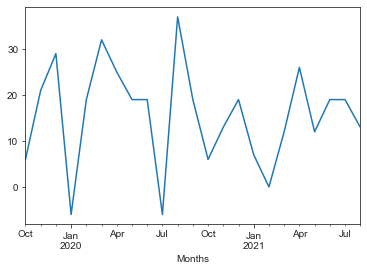

In [19]:
diff(df['Price'], k_diff=1).plot()
plt.savefig('diff sm.jpeg')

In [20]:
adf_test_result_new = adfuller(diff(df['Price'], k_diff=1))
adf_test_result_new

(-4.882059955386866,
 3.778966773534791e-05,
 1,
 21,
 {'1%': -3.7883858816542486,
  '5%': -3.013097747543462,
  '10%': -2.6463967573696143},
 96.7930791296262)

In [21]:
adftest_result_new = pd.Series(adf_test_result_new[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result_new

Adf test statistic        -4.882060
p-value                    0.000038
number of lags             1.000000
number of observations    21.000000
dtype: float64

In [22]:
from pandas.plotting import lag_plot

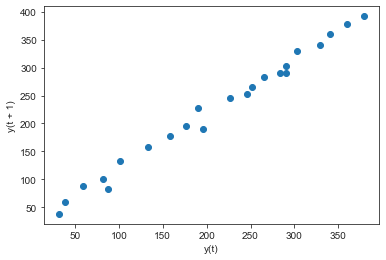

In [23]:
#still very high positive correlation
lag_plot(df['Price'])

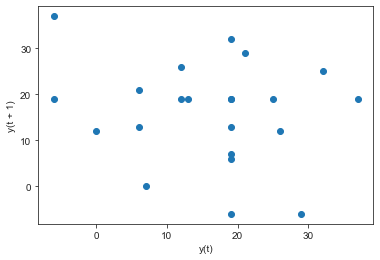

In [24]:
#And now here there is no correlation, since we have taken differencing of the series with a lag of 1
lag_plot(diff(df['Price'], k_diff=1))

# 5) Finding the MA term (q)

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

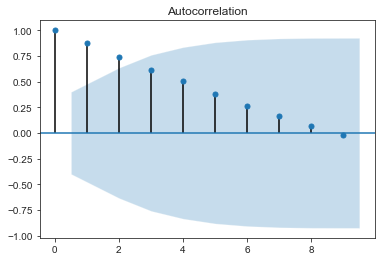

In [26]:
plot_acf(df['Price'], lags=9);

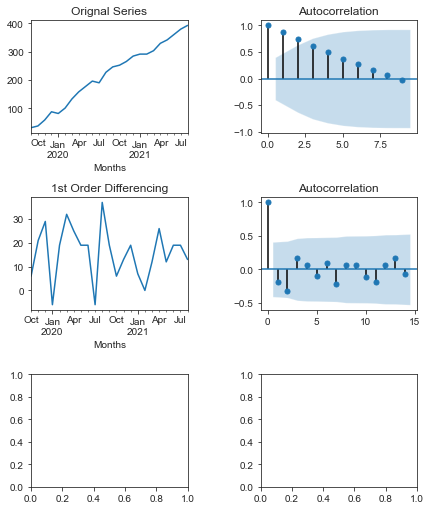

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,8))

fig.tight_layout(pad=4.5)

df['Price'].plot(ax=axs[0,0], title="Orignal Series")
plot_acf(df['Price'], lags=9, title="Autocorrelation", ax=axs[0][1])

diff(df['Price'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_acf(diff(df['Price'], k_diff=1), title="Autocorrelation", ax=axs[1][1])

plt.savefig('test2.jpeg')
plt.show()

# 6) Finding the AR term (p)

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

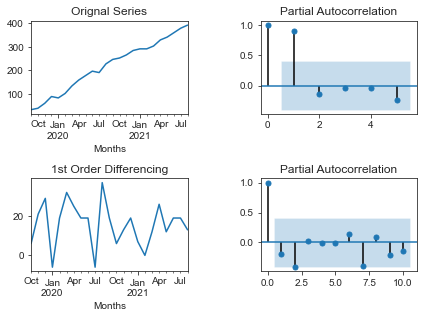

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,5))

fig.tight_layout(pad=4.5)

df['Price'].plot(ax=axs[0,0], title="Orignal Series")
plot_pacf(df['Price'], lags=5, title="Partial Autocorrelation", ax=axs[0][1])

diff(df['Price'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_pacf(diff(df['Price'], k_diff=1), lags=10, title="Partial Autocorrelation", ax=axs[1][1])
plt.savefig('test.jpeg')
plt.show()

# 5) Auto Arima

In [30]:
from pmdarima import auto_arima

In [31]:
x = auto_arima(train_data['Price'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=151.699, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.141, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=152.237, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=168.958, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.290 seconds


# 6) Statsmodels Arima


In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model = ARIMA(train_data['Price'], order=(0,1,0))

model_fit = model.fit()

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                   19
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -73.850
Method:                           css   S.D. of innovations             11.797
Date:                Thu, 01 Jul 2021   AIC                            151.699
Time:                        16:40:40   BIC                            153.588
Sample:                    10-31-2019   HQIC                           152.019
                         - 04-30-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6316      2.707      5.776      0.000      10.327      20.936
==============================================================================
"""

In [35]:
# Forecast
fc, se, conf = model_fit.forecast(steps=len(test_data))
fc, se, conf

(array([344.63157895, 360.26315789, 375.89473684, 391.52631579]),
 array([11.7974597 , 16.68412751, 20.4337996 , 23.5949194 ]),
 array([[321.50898282, 367.75417507],
        [327.56286886, 392.96344693],
        [335.84522555, 415.94424813],
        [345.28112354, 437.77150804]]))

In [36]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
fc_series

Months
2021-05-31    344.631579
2021-06-30    360.263158
2021-07-31    375.894737
2021-08-31    391.526316
dtype: float64

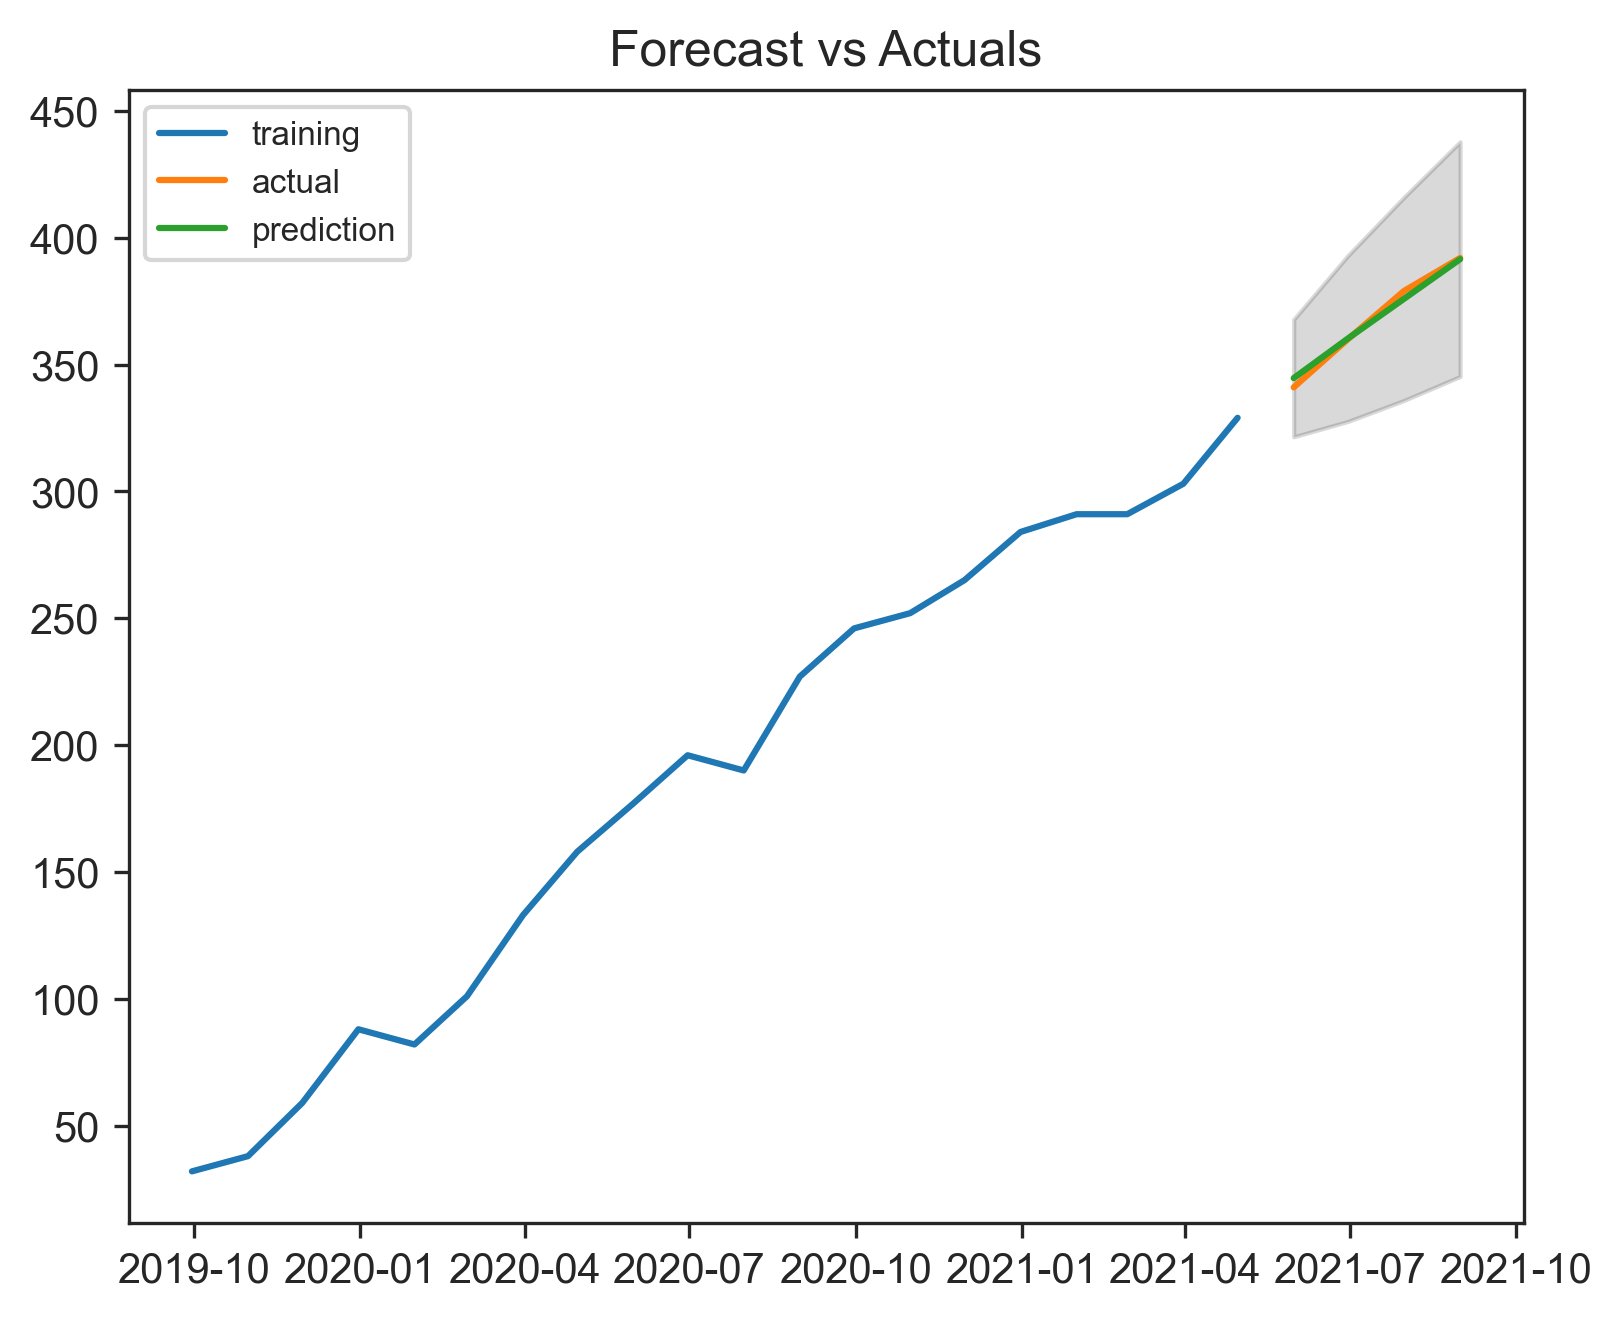

In [37]:
plt.figure(figsize=(6,5), dpi=300)
plt.plot(train_data['Price'], label='training')
plt.plot(test_data['Price'], label='actual')
plt.plot(fc_series, label='prediction')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Forecast Vs Actual big.jpeg')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
display(fc_series) # Forecasted Output

Months
2021-05-31    344.631579
2021-06-30    360.263158
2021-07-31    375.894737
2021-08-31    391.526316
dtype: float64

In [40]:
display(test_data['Price']) #Test output

Months
2021-05-31    341.0
2021-06-30    360.0
2021-07-31    379.0
2021-08-31    392.0
Name: Price, dtype: float64

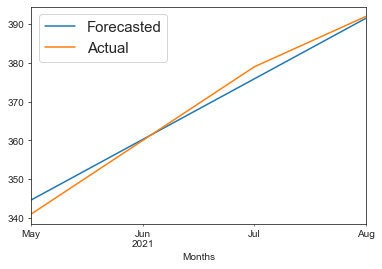

In [41]:
fc_series.rename('Forecasted').plot(legend=True)
test_data['Price'].rename('Actual').plot(legend=True)
plt.savefig('Forecast Vs Actual.jpeg')

In [42]:
sqrt(mean_squared_error(fc_series, test_data['Price']))

2.4044050064211278